# <center>L2 Computational Physics</center>
---

## Week 5: Monte Carlo Methods

In this notebook, you will simulate a system with of three nuclei $A$, $B$ and $C$ where $A$ decays into $B$ and $B$ decays into $C$. If exposed to a neutron flux nucleus $C$ can be activated into a nucleus $A$. 

In [220]:
import numpy
from matplotlib import pyplot as plt
import random

Implement a function that tells whether a transition has occured, based on the transition probability and a random number. Use the random number `r` from `random.random()` and use the procedure described in the notes so that the checks can work in a reproducible way.

In [221]:

def has_transitioned(prob):
    r = random.random()
    return r<=prob


In [192]:
# this test is worth 1 mark
random.seed(9867)
assert [ has_transitioned(0.5) for i in range(10)] == [False, False, True, False, False, False, False, True, False, True]

We are going to keep track of the state of the atoms using a either `'A'`, `'B'` or `'C'` for each nucleus. For example 
```python
state = ['A', 'A', 'B', 'A', 'C']
```

We will capture the possible physical reaction in a list of allowed transitions such as

`('A', 'B', 0.25 )`

where the first element is the initial state, the second element is the final state of the transition and its probability in the time interval considered is the third argument.

Define a function that takes as arguments the current state and a list of such transition rules and implements the transition (or not) and returns the new state

In [193]:
def evolveOne(currentState, rules):
    # YOUR CODE HERE
    if currentState=='A': 
        if has_transitioned((rules[0])[2])==True:
            currentState=str((rules[0])[1])
    elif currentState=='B':
        if has_transitioned(rules[1][2])==True:
            currentState=str(rules[1][1])
    return currentState

alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]


print(has_transitioned(alwaysDecayRules[0][2]))
print(str((alwaysDecayRules[0])[1]))

evolveOne('A', alwaysDecayRules) 

evolveOne('B', alwaysDecayRules) 
            
    

True
B


'C'

In [194]:
# these tests are worth 1 mark
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]
assert evolveOne('A', alwaysDecayRules) == 'B'
assert evolveOne('B', alwaysDecayRules) == 'C'

In [195]:
# these tests are worth 2 mark
random.seed(112211)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'B'

assert evolveOne('B', testRules) == 'B'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'

# with no rules there should be no change
assert evolveOne('C', testRules) == 'C'


Now implement a function that takes a list of states and transition them according to the rules passed as argument. This function should return a new vector of states, it should not modify the state passed as an argument!

In [196]:
def evolveMany(states, rules):
    newState = []
    # YOUR CODE HERE
    for i in range(len(states)):
        
        if states[i]=='A':
            if has_transitioned((rules[0])[2])==True:
                newState.append(str((rules[0])[1]))
            else:
                newState.append(str(states[i]))
        elif states[i]=='B':
            if has_transitioned(rules[1][2])==True:
                newState.append(str((rules[1])[1]))
            else:
                newState.append(str(states[i]))
        elif states[i]=='C':
            newState.append(str(states[i]))
       
    return (newState)

random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)

print(len(initialTestArray))




15


In [197]:
# these tests are worth 1 mark
random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)
targetArray = ['B', 'C', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C', 'C'] 
assert evolvedTest == targetArray
# checks the initial array is left unchanged
assert initialTestArray == ['A','B','C']*5

Define a function that evolves a system that starts with initial amounts `NA`, `NB` and `NC` of $A$, $B$ and $C$ nuclei and evolved it in `n_timestep` from time $t=0$ to $t=t_{max}$. The function should return three arrays, one for each atom type, of the number of nuclei of that type at each time step. Each array should contain `n_timestep+1` elements including the initial amount. 
 

In [198]:
def evolve_system(NA, NB, NC, rules, n_step):
    state = (['A'] * NA)+(['B'] * NB)+(['C'] * NC)

    A_count = numpy.empty(n_step + 1, dtype=int)
    B_count = numpy.empty(n_step + 1, dtype=int)
    C_count = numpy.empty(n_step + 1, dtype=int)

    # YOUR CODE HERE
    A_count[0]=NA
    B_count[0]=NB
    C_count[0]=NC
    for t in range(1,n_step+1):
        x=0
        y=0
        z=0
        for i in range(len(state)):
            if state[i]=='A':
                if has_transitioned(rules[0][2])==True:
                    state[i]='B'
                    x+=-1
                    y+=+1
                    z+=0
                else:
                    x+=0
                    y+=0
                    z+=0
            elif state[i]=='B':
                if has_transitioned((rules[1])[2])==True:
                    state[i]='C'
                    x+=0
                    y+=-1
                    z+=1
                else:
                    x+=0
                    y+=0
                    z+=0
            elif state[i]=='C':
                if has_transitioned(rules[2][2])==True:
                    state[i]='A'
                    y+=0
                    z+=-1
                    x+=1
                else:
                    x+=0
                    y+=0
                    z+=0
                
        A_count[t]=A_count[t-1]+x 
        B_count[t]=B_count[t-1]+y
        C_count[t]=C_count[t-1]+z 
       
     
    
    return A_count, B_count, C_count, #numpy.array(state)

random.seed(9485)
testrules = [
    ('A', 'B', 0.086),
    ('B', 'C', 0.075),
    ('C', 'A', 0.19)]
state1=(['A'] * 200)+(['B'] * 200)+(['C'] * 200)
#print( state1)
print(len(state1))
evolve_system(200,200,200, testrules, 20)

600


(array([200, 213, 233, 250, 258, 251, 266, 263, 259, 260, 265, 259, 256,
        255, 258, 256, 259, 253, 249, 247, 253]),
 array([200, 198, 201, 206, 205, 214, 214, 212, 216, 221, 225, 234, 236,
        238, 234, 235, 231, 245, 253, 256, 252]),
 array([200, 189, 166, 144, 137, 135, 120, 125, 125, 119, 110, 107, 108,
        107, 108, 109, 110, 102,  98,  97,  95]))

In [199]:
# these tests are worth 2 marks
rules = [
    ('A', 'B', 0.0033),
    ('B', 'C', 0.0075),
    ('C', 'A', 0.009)
    
]

r1, r2, r3 = evolve_system(0,0,250, rules, 17)
assert len(r1) == 18
assert len(r2) == 18
assert len(r3) == 18

In [200]:
# these tests are worth 2 marks 
testrules = [
    ('A', 'B', 0.086),
    ('B', 'C', 0.075),
    ('C', 'A', 0.19)
    
]

random.seed(9485)
r1, r2, r3 = evolve_system(200,200,200, testrules, 20)
assert (r1 == [200, 213, 233, 250, 258, 251, 266, 263, 259, 260, 265, 259, 256,
        255, 258, 256, 259, 253, 249, 247, 253]).all()
assert (r2 == [200, 198, 201, 206, 205, 214, 214, 212, 216, 221, 225, 234, 236,
        238, 234, 235, 231, 245, 253, 256, 252]).all()
assert (r3 == [200, 189, 166, 144, 137, 135, 120, 125, 125, 119, 110, 107, 108,
        107, 108, 109, 110, 102,  98,  97,  95]).all()

## Plotting tasks

Create a plot with the number of $A$, $B$ and $C$ nuclei, starting with 250 $C$ nuclei and evolving the system for 100 hours using 200 steps and with neutron flux on. Evolve the system for another 100 hours (using 200 steps) without neutron flux (i.e. no transitions from $C$ to $A$).  

The half life of the $A$ atoms is 10.1 hours, the half life of $B$ nuclei is 15.7 hours and we can caracterise the rate of activation of $C$ into $A$ when the neutron flux is on with and effective half-life of 3.2 hours.

The plot should have the appropriate labels and legend. [8 marks]    




200
[250 197 156 117  88  71  61  47  41  31  29  33  29  22  21  19  18  21
  20  20  20  21  18  20  20  22  20  20  16  17  23  24  22  20  24  24
  23  30  32  31  29  29  34  30  34  32  36  34  34  35  32  28  20  22
  25  27  30  24  26  26  29  26  29  27  29  27  29  31  28  30  27  23
  25  29  35  35  30  32  28  28  25  29  32  31  30  28  34  28  23  23
  22  31  30  28  22  25  26  27  25  30  22  22  22  26  29  31  31  28
  25  27  28  27  34  29  28  30  30  31  32  27  23  21  22  24  25  29
  30  31  37  38  33  28  30  30  27  28  30  32  31  30  28  31  41  35
  32  30  28  26  29  27  30  29  25  26  25  31  33  34  35  30  29  28
  26  28  30  32  33  34  32  31  35  36  30  29  30  29  25  26  29  26
  30  26  29  31  33  31  29  29  33  30  31  27  26  24  28  25  23  28
  30  37]


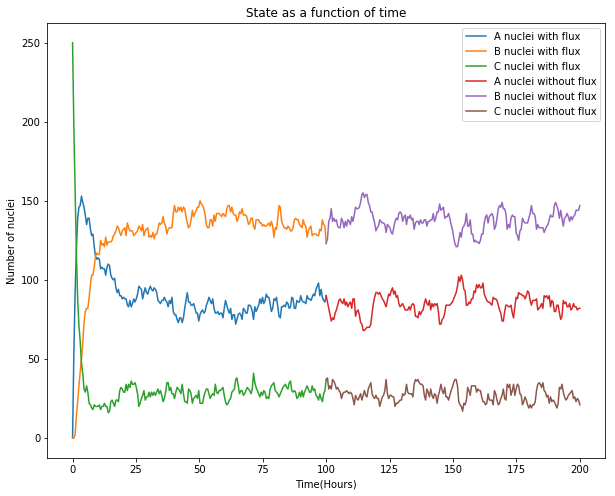

In [262]:

nsteps = 200
t_total = 100
t_half_A = 10.1
lambda_A=numpy.log(2)/t_half_A
t_half_B = 15.7
lambda_B=numpy.log(2)/t_half_B
t_half_C = 3.2
lambda_C=numpy.log(2)/t_half_C

time=numpy.linspace(0,100,200)
print(len(NC))
TestRules0=[('A','B',lambda_A),('B','C',lambda_B),('C','A',lambda_C)]

TestRules1=[('A','B',lambda_A),('B','C',lambda_B),('C','A',0)]

time2=numpy.linspace(100,200,200)


NA,NB,NC=evolve_system(0, 0, 250, TestRules0, 199)

NA1,NB1,NC1=evolve_system(NA[199], NB[199], NC[199], TestRules0, 199)

print(NC)
plt.figure(figsize=(10, 8))
plt.plot(time,NA)
plt.plot(time,NB)
plt.plot(time,NC)
plt.plot(time2,NA1)
plt.plot(time2,NB1)
plt.plot(time2,NC1)

plt.xlabel("Time(Hours)")
plt.ylabel("Number of nuclei")
plt.title("State as a function of time")
plt.legend(["A nuclei with flux","B nuclei with flux","C nuclei with flux","A nuclei without flux","B nuclei without flux","C nuclei without flux"])

Run the above simulation 20 times with 200 steps and use the results to calculate an average and the uncertainty on the number of $A$ atoms as a function of time. Use and `errorbar` plot for it. You might be interested in the `numpy.average` and `numpy.std` functions. The plot should have axis labels and a title.  [3 marks]


In [282]:
nsim = 20
totalA=[]
for i in range(0,2):
    nsteps = 200
    t_total = 100
    t_half_A = 10.1
    lambda_A=numpy.log(2)/t_half_A
    t_half_B = 15.7
    lambda_B=numpy.log(2)/t_half_B
    t_half_C = 3.2
    lambda_C=numpy.log(2)/t_half_C

    time=numpy.linspace(0,100,200)
    TestRules0=[('A','B',lambda_A),('B','C',lambda_B),('C','A',lambda_C)]

    TestRules1=[('A','B',lambda_A),('B','C',lambda_B),('C','A',0)]

    time2=numpy.linspace(100,200,200)


    NA,NB,NC=evolve_system(0, 0, 250, TestRules0, 199)
    

    NA1,NB1,NC1=evolve_system(NA[199], NB[199], NC[199], TestRules0, 199)
    totalA=numpy.concatenate([NA,NA1])
    print(totalA)
    print()
print(numpy.average(NA))
print(numpy.std(NA))

[  0  51  91 121 140 143 145 152 151 160 154 153 149 147 136 130 123 123
 120 117 110 106 104 104 101 102  99 100  96  94  93  86  85  85  87  84
  79  81  80  83  85  82  84  88  91  89  86  89  93  97  98  98  97  98
 100  92  82  79  82  79  86  81  83  83  90  93  93  96  94  86  88  92
  90  92  89  84  84  85  84  83  86  94  99  97 100  99  99  99  94  95
  96  94 100  96  90  88  89  84  85  84  80  83  80  72  75  76  74  78
  71  71  72  74  77  78  80  77  76  80  78  78  77  78  78  82  81  78
  81  85  88  85  83  85  87  91  95  93  95  98 100 101  95  95  94  86
  89  91  94  93  91  90  91  88  88  87  86  83  85  83  81  80  82  79
  77  80  81  87  89  80  84  81  82  91  91  88  87  82  84  84  87  84
  82  83  85  90  91  87  86  87  88  86  85  77  76  79  82  89  93  96
  90  88  88  83  83  82  86  85  89  91  96  98  99  98  97  92  83  83
  79  85  82  82  86  86  82  87  90  88  90  88  92  96 102 102  97  93
 100  93  93  95  94  92  89  85  84  79  81  82  8